# Sarcasm Detection 

## Project Work by Sakina Hajiyeva on NLP 

### Eotvos Lorand University, Faculty of Informatics, MSc Data Science



## Content draft:
1.*Introduction* 

2.*Data Preprocessing* 

3.*Exploratory Analysis*
       
4.*Training the model* (Methods and Algorithms)

        a)Tf-Idf and Logistic Regression pipeline to predict sarcasm
        b)
        c)
        
5.*Comparing the results*       

6.*Challenges in Sarcasm Detection*

7.*Future Scope & Conclusion*



## Introduction

Sarcasm is a form of verbal irony that is intended to express contempt or ridicule. Relying on the shared knowledge between the speaker and his audience, sarcasm requires wit to understand and wit to produce. In our daily interactions, we use gestures and mimics, intonation and prosody to hint the sarcastic intent. Since we do not have access to such paralinguistic cues, detecting sarcasm in written text is a much harder task.

Here is one of the definitions of sarcasm to better understand it: "Use of words that mean the opposite of what you really want to say, especially in order to show irritation or just to be funny". 

I investigated various methods to detect sarcasm in tweets, using both traditional machine learning (SVMs and Logistic Regressors on discrete features) and deep learning models (CNNs, LSTMs, GRUs, Bi-directional LSTMs and attention-based LSTMs), evaluating them on a Twitter dataset.

Let's take a look into our data:



In [52]:
# Let's import some essential libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib import pyplot as plt

In [53]:
# Reading the csv file

df = pd.read_csv('train-balanced-sarcasm.csv')
df

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...
...,...,...,...,...,...,...,...,...,...,...
1010821,1,I'm sure that Iran and N. Korea have the techn...,TwarkMain,reddit.com,2,2,0,2009-04,2009-04-25 00:47:52,"No one is calling this an engineered pathogen,..."
1010822,1,"whatever you do, don't vote green!",BCHarvey,climate,1,1,0,2009-05,2009-05-14 22:27:40,In a move typical of their recent do-nothing a...
1010823,1,Perhaps this is an atheist conspiracy to make ...,rebelcommander,atheism,1,1,0,2009-01,2009-01-11 00:22:57,Screw the Disabled--I've got to get to Church ...
1010824,1,The Slavs got their own country - it is called...,catsi,worldnews,1,1,0,2009-01,2009-01-23 21:12:49,I've always been unsettled by that. I hear a l...


In [54]:
df.head(10)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...
5,0,"I don't pay attention to her, but as long as s...",only7inches,AskReddit,0,0,0,2016-09,2016-09-02 10:35:08,do you find ariana grande sexy ?
6,0,Trick or treating in general is just weird...,only7inches,AskReddit,1,-1,-1,2016-10,2016-10-23 21:43:03,What's your weird or unsettling Trick or Treat...
7,0,Blade Mastery+Masamune or GTFO!,P0k3rm4s7,FFBraveExvius,2,-1,-1,2016-10,2016-10-13 21:13:55,Probably Sephiroth. I refuse to taint his grea...
8,0,"You don't have to, you have a good build, buy ...",SoupToPots,pcmasterrace,1,-1,-1,2016-10,2016-10-27 19:11:06,What to upgrade? I have $500 to spend (mainly ...
9,0,I would love to see him at lolla.,chihawks,Lollapalooza,2,-1,-1,2016-11,2016-11-21 23:39:12,Probably count Kanye out Since the rest of his...


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
label             1010826 non-null int64
comment           1010773 non-null object
author            1010826 non-null object
subreddit         1010826 non-null object
score             1010826 non-null int64
ups               1010826 non-null int64
downs             1010826 non-null int64
date              1010826 non-null object
created_utc       1010826 non-null object
parent_comment    1010826 non-null object
dtypes: int64(4), object(6)
memory usage: 77.1+ MB


From what we see, our dataset contains of 10 columns and 1010826 rows, which is good news.

## Data Preprocessing

This is the stage where we clean all the mess from data, namely, unnecessary columns and objects are deleted and all others added or preprocessed and cleaned. Let's start by dropping Comment section null objects, since some comments are missing.

In [56]:
df.dropna(subset=['comment'], inplace=True)
df.tail(10)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
1010816,1,forgot to add,Jalisciense,WTF,1,1,0,2009-03,2009-03-09 23:00:16,Columbine is ten years old this year. People m...
1010817,1,So *that's* why I can point my finger and have...,Dark-Star,atheism,1,1,0,2009-03,2009-03-31 01:25:55,I told my mom i didn't like religious people. ...
1010818,1,OH SWEET ANOTHER GUITAR HERO CLONE,Mulsanne,gaming,1,1,0,2009-04,2009-04-04 16:38:07,Brutal Legend Screenshots Will Rock Your Face
1010819,1,"oh wow, I have never seen this before.",ebendread,WTF,3,3,0,2009-04,2009-04-08 03:25:41,WHO WAS PHONE?
1010820,1,:O,DiarrheaMonkey,politics,1,1,0,2009-04,2009-04-15 03:02:01,US combat troops may stay in northern Iraq aft...
1010821,1,I'm sure that Iran and N. Korea have the techn...,TwarkMain,reddit.com,2,2,0,2009-04,2009-04-25 00:47:52,"No one is calling this an engineered pathogen,..."
1010822,1,"whatever you do, don't vote green!",BCHarvey,climate,1,1,0,2009-05,2009-05-14 22:27:40,In a move typical of their recent do-nothing a...
1010823,1,Perhaps this is an atheist conspiracy to make ...,rebelcommander,atheism,1,1,0,2009-01,2009-01-11 00:22:57,Screw the Disabled--I've got to get to Church ...
1010824,1,The Slavs got their own country - it is called...,catsi,worldnews,1,1,0,2009-01,2009-01-23 21:12:49,I've always been unsettled by that. I hear a l...
1010825,1,"values, as in capitalism .. there is good mone...",frogking,politics,2,2,0,2009-01,2009-01-24 06:20:14,Why do the people who make our laws seem unabl...


What other columns contain null-s and how's our comment column doing? Let's check it:

In [81]:
df.isna().sum(axis=0)

label             0
comment           0
author            0
subreddit         0
score             0
ups               0
downs             0
date              0
created_utc       0
parent_comment    0
dtype: int64

Very good! No null objects left. Next, let's take a look at some of the comments and pull out a few examples of sarcastic ones. Here are the first 10 sarcastic comments, just so we can get a glimpse of what we're talking about:

In [84]:
for c in df[df["label"] == 1]["comment"][0:10]:
    print(c)

But they'll have all those reviews!
wow it is totally unreasonable to assume that the agency that covered up Bush war crimes because "muh republican party" would be partisan as fuck
Ho ho ho... But Melania said that there is no way it could have happened because she didn't know the woman!
I can't wait until @potus starts a twitter war against Morning Joe.
gotta love the teachers who give exams on the day after halloween
Hoiberg said "great players", not Dwight
Oh, I never realized it was so easy, why had I, and every other lonely person on earth never thought of that before?
Exactly, no reason whatsoever.
Hank would have a great time in the Legends of Tomorrow.
I remember reading all of those stories in the news about riot police marching into the Volvo head offices with truncheons and beating the designers until they invented the seatbelt.


Now that we have a clearer picture of what we're dealing with, let's continue by taking a glance at some column statistics.

In [85]:
df.describe()

,label,score,ups,downs
count,1.010773e+06,1.010773e+06,1.010773e+06,1.010773e+06
mean,4.999817e-01,6.885999e+00,5.499140e+00,-1.458686e-01
std,5.000002e-01,4.834411e+01,4.127402e+01,3.529746e-01
min,0.000000e+00,-5.070000e+02,-5.070000e+02,-1.000000e+00
25%,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00
75%,1.000000e+00,4.000000e+00,3.000000e+00,0.000000e+00
max,1.000000e+00,9.070000e+03,5.163000e+03,0.000000e+00


 We can see that the maximum values of score and ups are very high, but the maximum of downs is only 0. Likewise, the minimum values for score and ups get very low to -507, but the minimum for downs is only -1. The label column is also included and we can see from the mean of 0.5 that it is most likely balanced between the classes of 0 and 1. We can check this explicitly later. Let's examine that one more time here :

In [82]:
df['label'].value_counts()

0    505405
1    505368
Name: label, dtype: int64

In [92]:
df.groupby("label").agg({"score" : "mean"})

,score
label,
0,7.370550
1,6.401412


Looks like there's a difference, but it's so slight that it may not be significant. But averages do not paint a full picture of the data; what if we take a look at the distribution of scores? Let's continue on by making a histogram comparing the sarcastic scores and the normal scores.

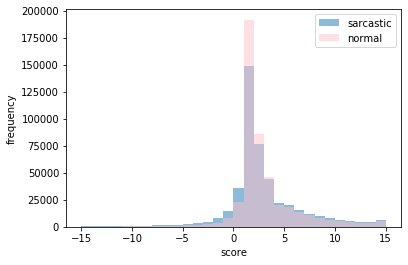

In [94]:
scores_sarc = df["score"][df["label"] == 1]
scores_norm = df["score"][df["label"] == 0]
bins = list(range(-15, 16))
plt.hist(scores_sarc, bins=bins, alpha=0.5, label="sarcastic")
plt.hist(scores_norm, bins=bins, alpha=0.5, color = "pink", label="normal")
plt.xlabel("score")
plt.ylabel("frequency")
plt.legend(loc="upper right")
plt.show()

From the given data, it's clear that it is balanced, since the number of 1 and 0 labeled objects is very near.


## Exploratory Analysis

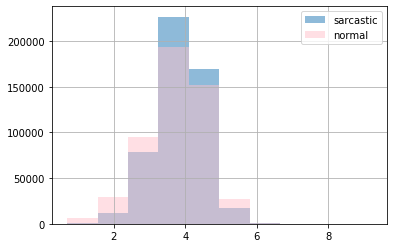

In [59]:
df.loc[df['label'] == 1, 'comment'].str.len().apply(np.log1p).hist(label='sarcastic', alpha=.5)
df.loc[df['label'] == 0, 'comment'].str.len().apply(np.log1p).hist(label='normal', color = "pink", alpha=.5)
plt.legend();

Distribution of lengths for sarcastic and normal comments is almost the same. 

I would like to create a wordcloud to see what words occur in the dataset:

In [60]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [61]:
from wordcloud import WordCloud, STOPWORDS

In [62]:
wordcloud = WordCloud(background_color='white', stopwords = STOPWORDS,
                max_words = 200, max_font_size = 100, 
                random_state = 17, width=800, height=400)

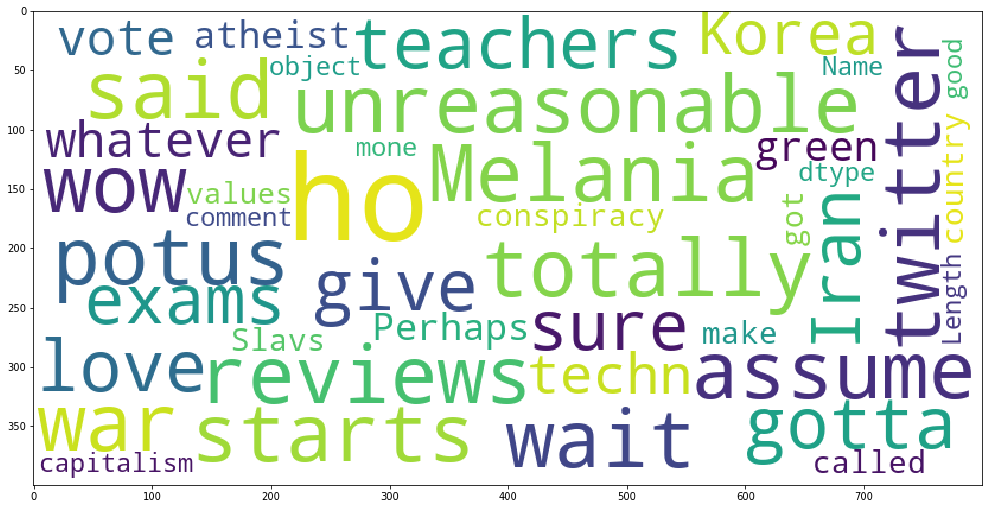

In [63]:
plt.figure(figsize=(17, 12))
wordcloud.generate(str(df.loc[df['label'] == 1, 'comment']))
plt.imshow(wordcloud);

From the wordcloud we see that some words, but they don't help us much in any way. Let's check the 0 label.

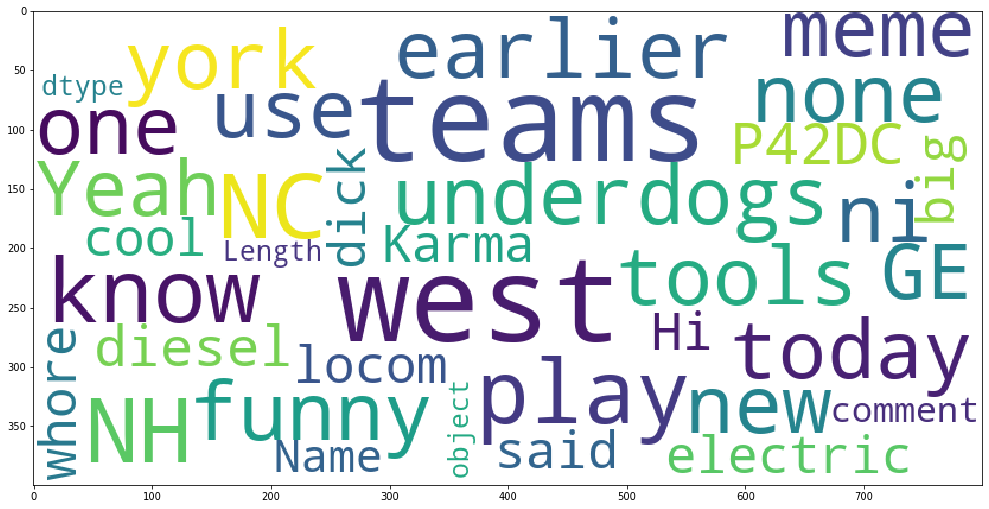

In [64]:
plt.figure(figsize=(17, 12))
wordcloud.generate(str(df.loc[df['label'] == 0, 'comment']))
plt.imshow(wordcloud);

In [65]:
import nltk

In [66]:
from nltk.corpus import words
word_list = words.words()

In [68]:
def gen_freq(comment):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in comment.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 30 words
    word_freq[:30]
    
    return word_freq

gen_freq(df.comment.str)

the           367615
a             236417
to            233411
I             166302
and           159431
               ...  
Food/Water         1
winamp?            1
nv4                1
tld                1
Abate              1
Length: 497257, dtype: int64

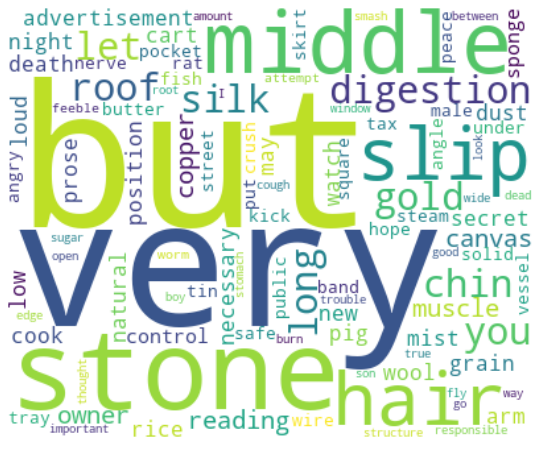

In [70]:
#Generate word cloud from frequent words 

word_freq = pd.Series(word_list).value_counts()

wc = WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Hmm, created this with hope that it may be useful some day...

Now let's start asking questions about the features. For example, I wonder if there are some subreddits that are more sarcastic than others.

To answer this question, I will calculate the percentage of sarcastic comments in each subreddit. But first, let's see how many different unique subreddits we have.

In [95]:
len(df["subreddit"].unique())

14876

Wow, many! Let's take a sample of 25% to see what we have:

In [96]:
top_subreddits = df["subreddit"].value_counts()[0:25]
top_subreddits = list(top_subreddits.index)

In [97]:
df[df["subreddit"].isin(top_subreddits)].groupby("subreddit").agg({"label" : "mean"})

,label
subreddit,
AdviceAnimals,0.560822
AskReddit,0.401453
CFB,0.513195
DotA2,0.493478
GlobalOffensive,0.552045
The_Donald,0.462640
TumblrInAction,0.609766
WTF,0.456790
atheism,0.639555


In [72]:
sub_df[sub_df['size'] > 1000].sort_values(by='mean', ascending=False).head(10)

,size,mean,sum
subreddit,,,
creepyPMs,5466,0.784303,4287
MensRights,3355,0.680775,2284
ShitRedditSays,1284,0.661994,850
worldnews,26376,0.642516,16947
Libertarian,2562,0.640125,1640
atheism,7377,0.639555,4718
Conservative,1881,0.639553,1203
TwoXChromosomes,1560,0.632692,987
fatlogic,2356,0.623090,1468


We can see that some subreddits seem much more sarcastic than others. The worldnews subreddit is highest among these with 64% sarcasm, whereas AskReddit is lowest with 40%. However, it may not mean that they're the most "sarcastic guys" here. Why?- Because its just a small sample and we cannot judge just by looking at it. We can say that they are some of the most sarcastic in our dataset. And it may be true that, as a whole, they tend to be more sarcastic than others. However, we cannot accept that the proportions we have calculated are representative of the whole subreddits.


Let's now check the same for authors:

In [73]:
sub_df = df.groupby('author')['label'].agg([np.size, np.mean, np.sum])
sub_df[sub_df['size'] > 300].sort_values(by='mean', ascending=False).head(10)

,size,mean,sum
author,,,
NeonDisease,422,0.500000,211
ShyBiDude89,404,0.500000,202
ivsciguy,342,0.500000,171
mad-n-fla,318,0.500000,159
mindlessrabble,302,0.500000,151
pokemon_fetish,432,0.500000,216
Biffingston,845,0.499408,422


Now the score:

In [74]:
sub_df = df[df['score'] >= 0].groupby('score')['label'].agg([np.size, np.mean, np.sum])
sub_df[sub_df['size'] > 300].sort_values(by='mean', ascending=False).head(10)

,size,mean,sum
score,,,
0,58141,0.612752,35626
20,3096,0.561370,1738
34,1071,0.556489,596
26,1874,0.554429,1039
59,315,0.552381,174
18,3951,0.551759,2180
13,7277,0.546929,3980
17,4404,0.545867,2404
40,722,0.545706,394


In [75]:
sub_df = df[df['score'] < 0].groupby('score')['label'].agg([np.size, np.mean, np.sum])
sub_df[sub_df['size'] > 300].sort_values(by='mean', ascending=False).head(10)

,size,mean,sum
score,,,
-14,537,0.698324,375
-8,1852,0.696004,1289
-9,1503,0.691284,1039
-6,3088,0.688795,2127
-12,776,0.684278,531
-5,4134,0.678520,2805
-3,6736,0.676069,4554
-2,11924,0.675948,8060
-4,5436,0.673473,3661


I think it's time to split the data into test and train. I set the test size to be 0.25, which means that the resulting test set will consist of 25% of the original data set, and the training set will be the remaining 75% :

In [99]:
train_df, test_df = train_test_split(df, test_size=0.25, random_state=42)
test_df.shape

(252694, 10)

## Training Models